In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("C:\\Users\\karth\\OneDrive\\Documents\\loan-train.csv")

data.drop('Loan_ID', axis=1, inplace=True)

data.fillna(method='bfill', inplace=True)  

data = pd.get_dummies(data, drop_first=True)

X = data.drop('Loan_Status_Y', axis=1)  
y = data['Loan_Status_Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



In [4]:

new_data = pd.read_csv("C:\\Users\\karth\\OneDrive\\Documents\\loan-test.csv")
new_data.drop('Loan_ID', axis=1, inplace=True)

new_data.fillna(method='bfill', inplace=True)

new_data = pd.get_dummies(data, drop_first=True)

In [5]:
new_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [6]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [7]:
X_new = new_data.drop('Loan_Status_Y', axis=1)
y_new = new_data['Loan_Status_Y']

y_pred_new = rf_classifier.predict(X_new)

accuracy_new = accuracy_score(y_new, y_pred_new)
print("Accuracy on new dataset:", accuracy_new)

Accuracy on new dataset: 0.9576547231270358


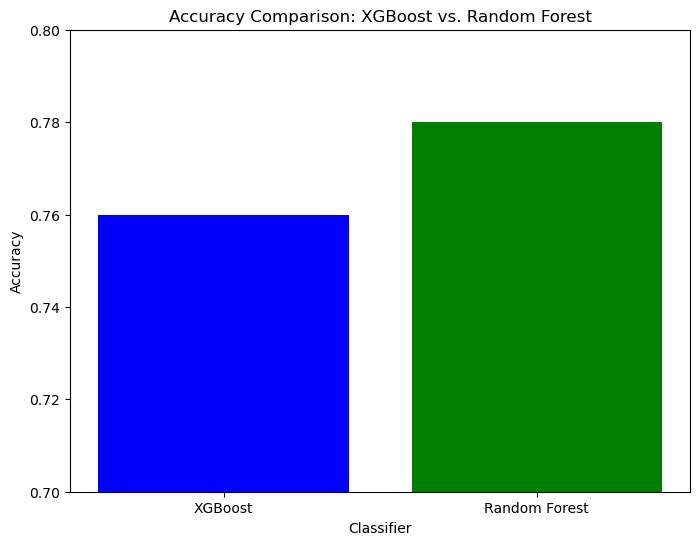

In [8]:
import matplotlib.pyplot as plt

accuracy_scores = {'XGBoost': 0.76, 'Random Forest': 0.78}

plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: XGBoost vs. Random Forest')
plt.ylim(0.7, 0.8)  # Set y-axis limits for better visualization
plt.show()


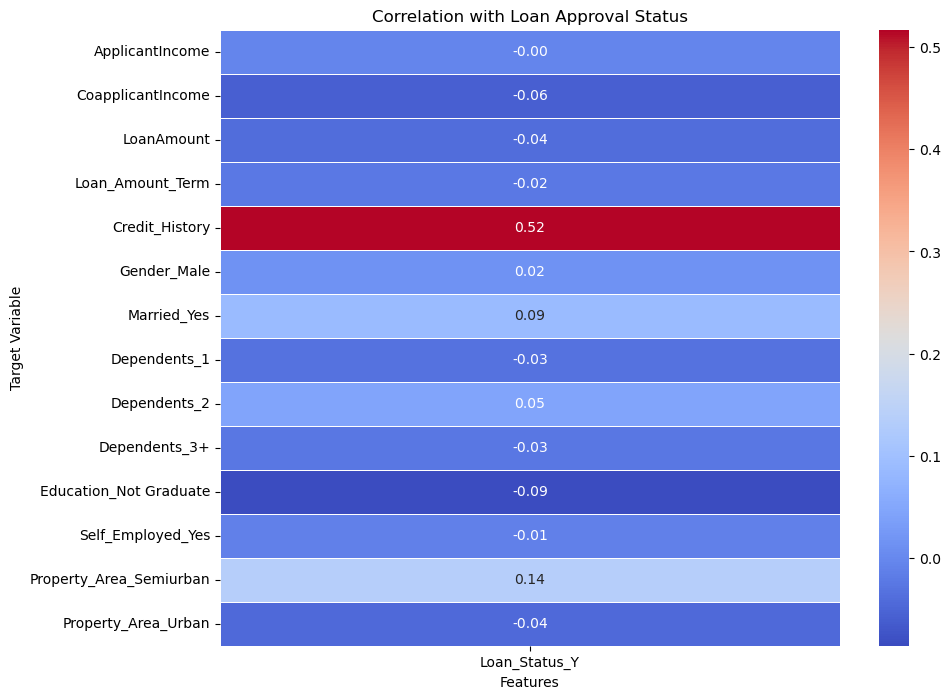

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

target_corr = corr_matrix['Loan_Status_Y'].drop('Loan_Status_Y')  

plt.figure(figsize=(10, 8))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation with Loan Approval Status')
plt.xlabel('Features')
plt.ylabel('Target Variable')
plt.show()
